In [ ]:
__author__ = "Birat Siku"
__email__ = "birat.sk21@gmail.com"

# Import and unzip Kaggle data set

In [ ]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

In [ ]:
# ! unzip chest-xray-pneumoniacovid19tuberculosis.zip

# Implementation

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_path='/content/train/' 
test_path='/content/test/'
category=sorted(os.listdir(train_path))
print(category)

['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
BATCH_SIZE = 16
IMG_SHAPE=(120,120)

train_images = image_dataset_from_directory(
  train_path,
  labels="inferred",
  label_mode="categorical", 
  subset="training",
  class_names = category, 
  validation_split=0.2,
  seed=123,
  shuffle = True,
  image_size=IMG_SHAPE,
  batch_size=BATCH_SIZE
)

test_images = image_dataset_from_directory(
  train_path,
  labels="inferred",
  label_mode="categorical",
  validation_split=0.2,
  class_names = category, 
  subset="validation",
  seed=123,
  shuffle = True,
  image_size=IMG_SHAPE,
  batch_size=BATCH_SIZE
)

val_images = image_dataset_from_directory(
  test_path,
  labels="inferred",
  label_mode="categorical",
  validation_split=0.01,
  class_names = category,
  subset="training",
  shuffle = True,
  seed=123,
  image_size=IMG_SHAPE,
  batch_size=BATCH_SIZE)

Found 6326 files belonging to 4 classes.
Using 5061 files for training.
Found 6326 files belonging to 4 classes.
Using 1265 files for validation.
Found 771 files belonging to 4 classes.
Using 764 files for training.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization

In [ ]:
model= Sequential()

model.add(Conv2D(filters=3,strides= 1, kernel_size = (3,3), activation='relu', input_shape=(IMG_SHAPE[0],IMG_SHAPE[1],3,)))
model.add(BatchNormalization())

model.add(Conv2D(filters=5,kernel_size = (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3)) 

model.add(Conv2D(filters=16,kernel_size = (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3)) 

model.add(Conv2D(filters=92,kernel_size = (3,3),activation='relu'))
model.add(Conv2D(filters=114,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(6,6))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 3)       84        
                                                                 
 batch_normalization_3 (Batc  (None, 118, 118, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 116, 116, 5)       140       
                                                                 
 batch_normalization_4 (Batc  (None, 116, 116, 5)      20        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 38, 38, 5)        0         
 2D)                                                             
                                                      

In [ ]:
history=model.fit(train_images,epochs=10,validation_data=test_images,verbose= 1)

Epoch 1/10
317/317 [==============================] - 134s 414ms/step - loss: 0.5951 - accuracy: 0.7696 - val_loss: 0.3285 - val_accuracy: 0.8791
Epoch 2/10
317/317 [==============================] - 133s 418ms/step - loss: 0.3294 - accuracy: 0.8795 - val_loss: 0.3077 - val_accuracy: 0.8751
Epoch 3/10
317/317 [==============================] - 132s 415ms/step - loss: 0.2614 - accuracy: 0.9057 - val_loss: 0.2524 - val_accuracy: 0.9075
Epoch 4/10
317/317 [==============================] - 135s 422ms/step - loss: 0.2453 - accuracy: 0.9097 - val_loss: 1.1039 - val_accuracy: 0.7431
Epoch 5/10
317/317 [==============================] - 133s 415ms/step - loss: 0.2120 - accuracy: 0.9308 - val_loss: 0.1843 - val_accuracy: 0.9328
Epoch 6/10
317/317 [==============================] - 135s 421ms/step - loss: 0.1681 - accuracy: 0.9441 - val_loss: 0.1626 - val_accuracy: 0.9375
Epoch 7/10
317/317 [==============================] - 133s 416ms/step - loss: 0.1423 - accuracy: 0.9534 - val_loss: 0.2247 -

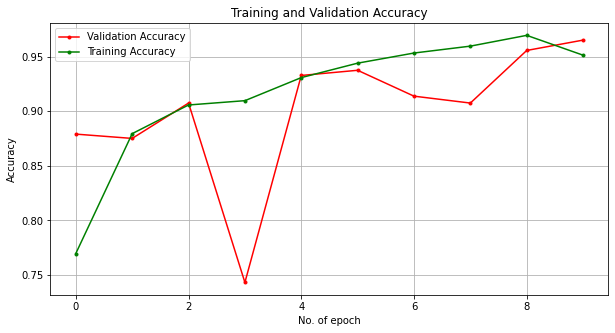

In [ ]:
plt.figure(figsize=(10, 5))
val_acc, = plt.plot(history.history['val_accuracy'],'r.-', label='Validation Accuracy')
acc, = plt.plot(history.history['accuracy'],'g.-', label='Training Accuracy')
plt.grid()
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(handles=[val_acc, acc])
plt.show()

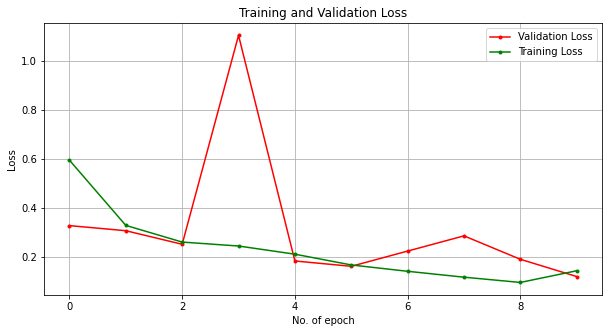

In [ ]:
plt.figure(figsize=(10, 5))
val_loss, = plt.plot(history.history['val_loss'],'r.-', label='Validation Loss')
loss, = plt.plot(history.history['loss'],'g.-', label='Training Loss')
plt.grid()
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('No. of epoch')
plt.legend(handles=[val_loss, loss])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')
output='/content/mydrive/My Drive/chest-xray/'

Mounted at /content/mydrive


In [ ]:
model.save(output+'Covid-Pneumonia-TB-ModelEpochs10.h5')

In [ ]:
label_for_val_images=[]
val_img = []
for imgs, label in val_images:
  val_img.extend(np.array(imgs)) 
  label_for_val_images.extend(np.argmax(label.numpy(),axis=1))

val_img=np.array(val_img)
val_lab=np.array(label_for_val_images)

In [ ]:
from keras.models import load_model
chest_m = load_model(output+"Covid-Pneumonia-TB-ModelEpochs10.h5")

In [ ]:
pred=chest_m.predict(val_img)
pred = np.argmax(pred,axis=1)
print("First 5 Predictions: ",[category[i] for i in pred[:5]])

First 5 Predictions:  ['NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA']


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

Accuracy on Validation set: 0.87696


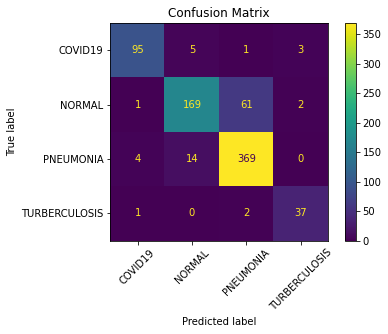

In [ ]:
cm = confusion_matrix(val_lab, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=category)

disp = disp.plot(include_values=category)
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
print("Accuracy on Validation set: %.5f"%(np.sum(np.diagonal(cm))/np.sum(cm)))
plt.show()

In [ ]:
print(classification_report(y_true=val_lab,y_pred=pred,target_names=category))

               precision    recall  f1-score   support

      COVID19       0.94      0.91      0.93       104
       NORMAL       0.90      0.73      0.80       233
    PNEUMONIA       0.85      0.95      0.90       387
TURBERCULOSIS       0.88      0.93      0.90        40

     accuracy                           0.88       764
    macro avg       0.89      0.88      0.88       764
 weighted avg       0.88      0.88      0.87       764

